In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [9]:
loan=pd.read_excel(r"C:\Users\HP\Downloads\ML Project - KNN Loan Applicant Credit Risk Analysis U 16955473070.xlsx")

In [11]:
loan

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [19]:
loan.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [23]:
loan.isnull().sum() #not null value in data set

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

In [30]:
loan.columns

Index(['Age', 'Total Work Experience', 'Number of years in city',
       'Cost to Request Ratio', 'Cibil score', 'Overdrafts past12months',
       'Total bounces past12months'],
      dtype='object')

In [32]:
loan.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


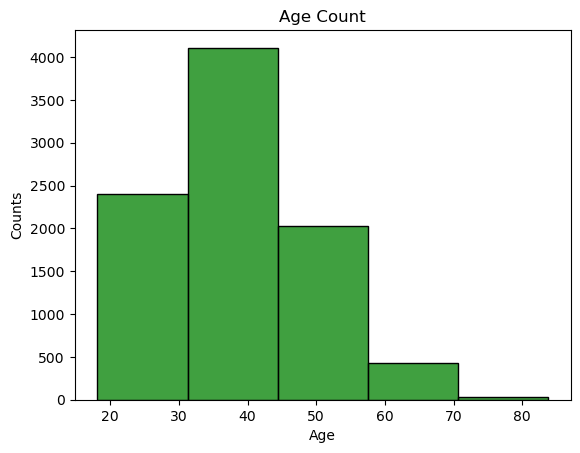

In [104]:
# Age 

sns.histplot(data=loan,x='Age',color="g",bins=5)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Count")
plt.show()

In [73]:
loan["Total Work Experience"].value_counts()

Total Work Experience
3    3550
1    2792
2    2464
4     146
5      43
Name: count, dtype: int64

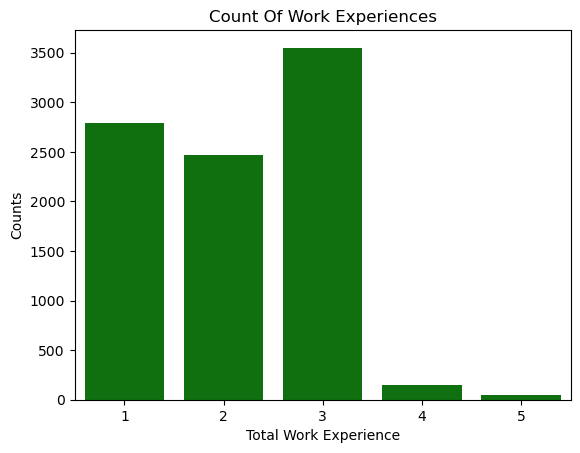

In [106]:
#Total Work Experience 

sns.countplot(data=loan,x="Total Work Experience",color='g')
plt.xlabel("Total Work Experience")
plt.ylabel("Counts")
plt.title("Count Of Work Experiences")
plt.show()

In [98]:
loan['Number of years in city'].value_counts()

Number of years in city
3    2347
4    2132
6    2075
5    1932
2     384
1     125
Name: count, dtype: int64

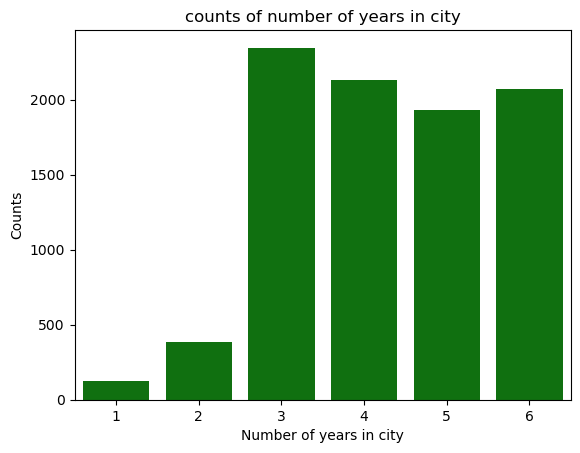

In [108]:
#Number of years in city
sns.countplot(data=loan,x="Number of years in city",color='g')
plt.xlabel("Number of years in city")
plt.ylabel("Counts")
plt.title("counts of number of years in city")
plt.show()

In [114]:
loan["Cost to Request Ratio"].value_counts()

Cost to Request Ratio
1.000000    334
0.750000     61
0.800000     57
0.833333     45
1.200000     44
           ... 
0.622815      1
0.868493      1
0.570939      1
0.414945      1
0.287659      1
Name: count, Length: 7769, dtype: int64

<Axes: xlabel='Cost to Request Ratio', ylabel='Density'>

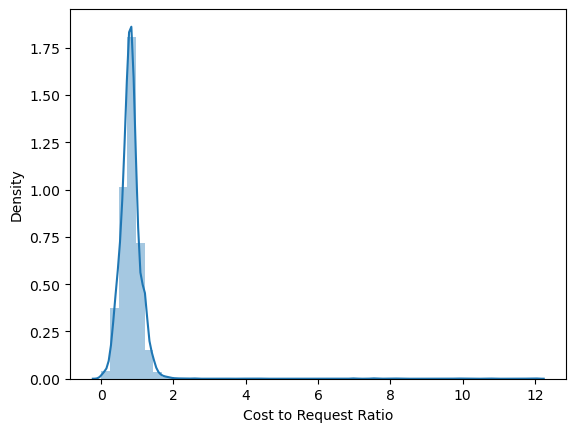

In [130]:
sns.distplot(loan["Cost to Request Ratio"])

<Axes: xlabel='Cibil score', ylabel='Density'>

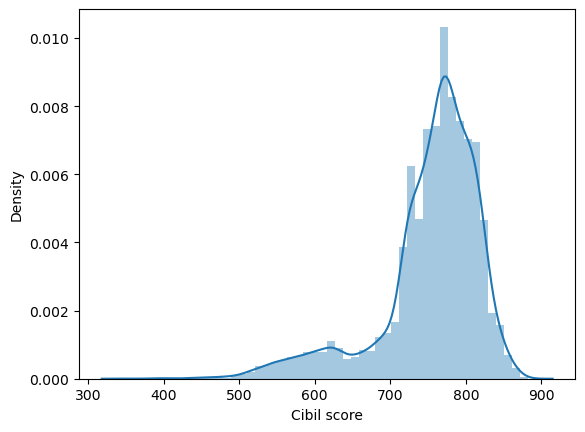

In [136]:
sns.distplot(loan["Cibil score"])

In [144]:
loan["Overdrafts past12months"].value_counts()

Overdrafts past12months
0     7187
1     1375
2      183
3      104
4       45
5       37
6       27
7       13
8        8
11       5
10       5
9        5
12       1
Name: count, dtype: int64

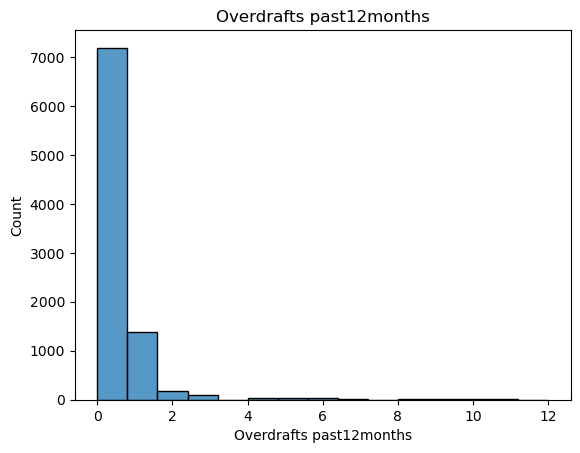

In [155]:
sns.histplot(loan["Overdrafts past12months"])
plt.title("Overdrafts past12months")
plt.show()

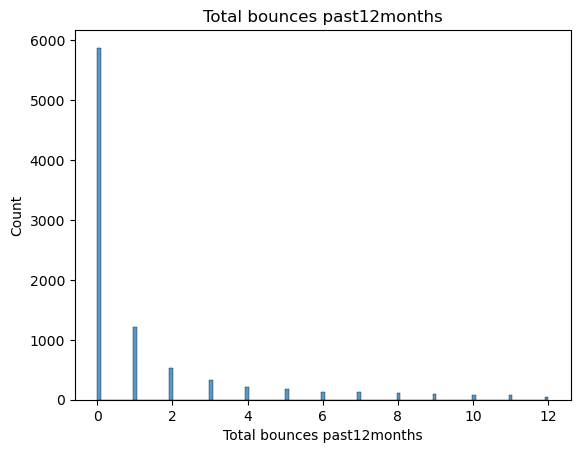

In [165]:
sns.histplot(loan["Total bounces past12months"])
plt.title("Total bounces past12months")
plt.show()

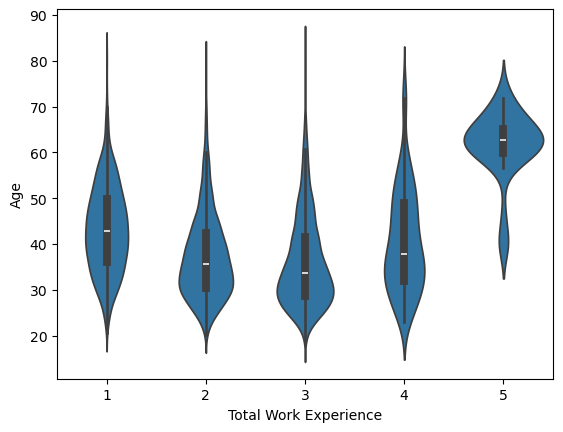

In [189]:
sns.violinplot(data=loan,x='Total Work Experience',y='Age')
plt.show()

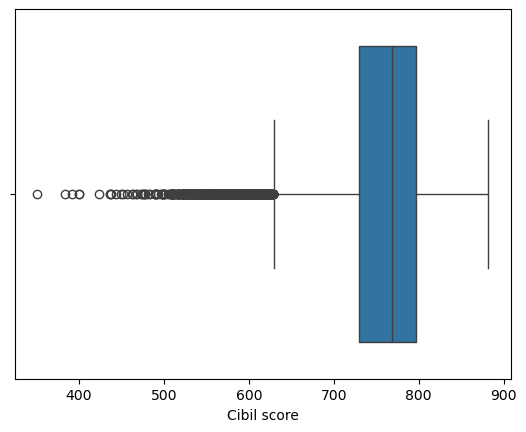

In [235]:
sns.boxplot(data=loan,x="Cibil score")
plt.show()

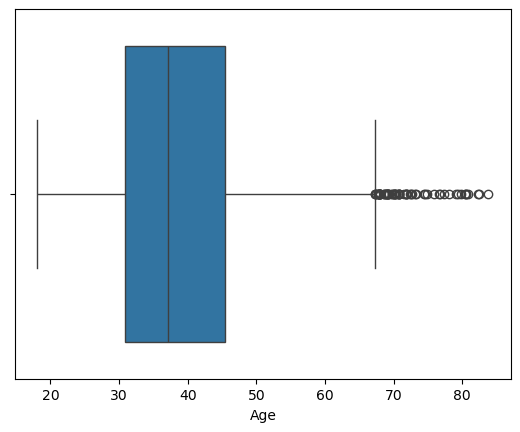

In [231]:
sns.boxplot(data=loan,x="Age")
plt.xlabel("Age")
plt.show()

In [205]:
loan

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


In [241]:
loan.columns

Index(['Age', 'Total Work Experience', 'Number of years in city',
       'Cost to Request Ratio', 'Cibil score', 'Overdrafts past12months',
       'Total bounces past12months'],
      dtype='object')

# Spliting

In [254]:
x=loan.drop("Overdrafts past12months",axis=1)

In [258]:
y=loan["Overdrafts past12months"]

In [324]:
y.value_counts()

Overdrafts past12months
0     7187
1     1375
2      183
3      104
4       45
5       37
6       27
7       13
8        8
11       5
10       5
9        5
12       1
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [713]:
from sklearn.preprocessing import MinMaxScaler

s=MinMaxScaler()

x_train_scaling=s.fit_transform(x_train)

x_test_scaling=s.fit_transform(x_test)

In [716]:
#get best model

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold

k=KFold(n_splits=5)

lost=[LogisticRegression,DecisionTreeClassifier,SVC,KNeighborsClassifier,RandomForestClassifier]

for i in lost:
    model=i()
    print(model)
    print(cross_val_score(model,x_train,y_train,cv=k).mean())
    

LogisticRegression()
0.8307397112192108
DecisionTreeClassifier()
0.7948857231101846
SVC()
0.7991941741950429
KNeighborsClassifier()
0.8210113118678095
RandomForestClassifier()
0.837966662805961


# KNeighborsClassifier

In [719]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

KNeighborsClassifier()

In [721]:
knn.score(x_train,y_train)

knn.score(x_test,y_test)

0.8360200111172874

In [731]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn.predict(x_test))

0.8360200111172874

In [733]:
#find best n_neighbors value 

train=[]
test=[]

for i in range(1,21):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    train.append(model.score(x_train,y_train))
    test.append(model.score(x_test,y_test))

In [473]:
k_range=range(1,21)
k_range[test.index(max(test))]

5

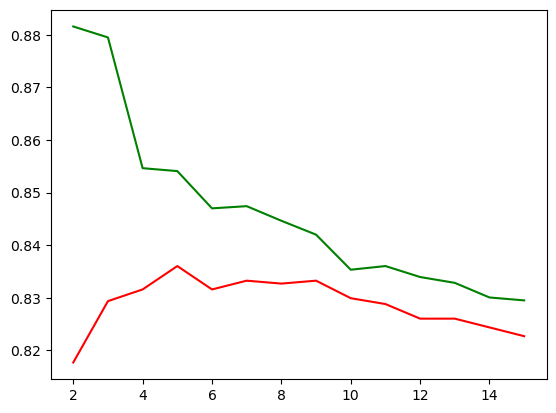

In [723]:
#line plot for find k
plt.plot(range(2,16),test[1:15],color='r')
plt.plot(range(2,16),train[1:15],color='g')

# LogisticRegression

In [736]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [738]:
lr.score(x_train,y_train)

lr.score(x_test,y_test)

0.831017231795442

In [740]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,lr.predict(x_test))

0.831017231795442

# RandomForestClassifier

In [743]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_depth=120, min_samples_split=150, n_estimators=50)

rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=120, min_samples_split=150, n_estimators=50)

In [745]:
rf.score(x_train,y_train)

rf.score(x_test,y_test)

0.8499166203446359

# Hyperparameter Tuning

In [694]:
from sklearn.model_selection import RandomizedSearchCV

In [696]:
dic={
    "n_estimators":[50,100,150,200,250],
    "max_depth":[25,50,80,100,120],
    "min_samples_split":[50,100,150,200,250]
}

In [698]:
rs=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=dic,cv=k)

In [700]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [25, 50, 80, 100, 120],
                                        'min_samples_split': [50, 100, 150, 200,
                                                              250],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]})

In [701]:
rs.best_estimator_

RandomForestClassifier(max_depth=120, min_samples_split=150, n_estimators=50)